# Imports and def of "show" function

In [1]:
import PIL.Image as im
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import random as rd
from tqdm import tqdm
import time

In [2]:
start = time.time()

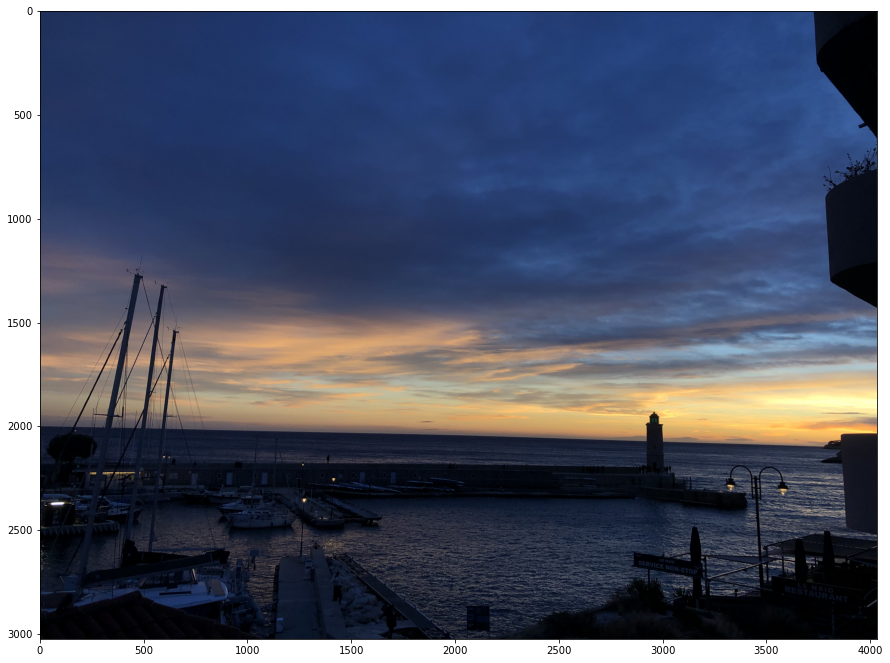

In [3]:
nessi = np.array(im.open('nessi.jpeg'))

n,m,useless = np.shape(nessi)
def show(data, r = 1, unique = True):
    if unique:
        plt.figure(r, figsize=(n//200, m//200))
        plt.imshow(data)
    else:
        l = len(data)
        plt.figure(r, figsize=(n//200, m//200))
        for i in range(l):
            plt.subplot(int(str(1)+str(l)+str(i+1)))
            print(np.shape(data[i]))
            plt.imshow(data[i])
show(nessi)

In [4]:
(n,m)

(3024, 4032)

# Division of the image

In [5]:
n_larg = 20
n_long = 20

long = n//n_long
larg = m//n_larg

arrays=[]
for i in range(n_long):
    for j in range(n_larg):
        arrays.append(nessi[i*long:(i+1)*long,j%n_larg*larg:(j%n_larg+1)*larg])

In [6]:
arrays_after = []
arrays_before = []
#arrays_before = list(np.copy(np.asarray(arrays)))
#arrays_after = np.copy(arrays)

liste1 = [k for k in range(1,n_larg*n_long)]
liste2 = [k for k in range(n_larg*n_long)]
rd.shuffle(liste1)
liste1 = [0] + liste1

for i in range(len(liste1)):
    arrays_after.append(arrays[liste1[i]])
    arrays_before.append(arrays[liste2[i]])
    
arrays_after = np.asarray(arrays_after)

#rd.shuffle(arrays_after)
#print(unique(list(arrays_after)))

# The image is now shuffled

(3020, 4020, 3)
(3020, 4020, 3)


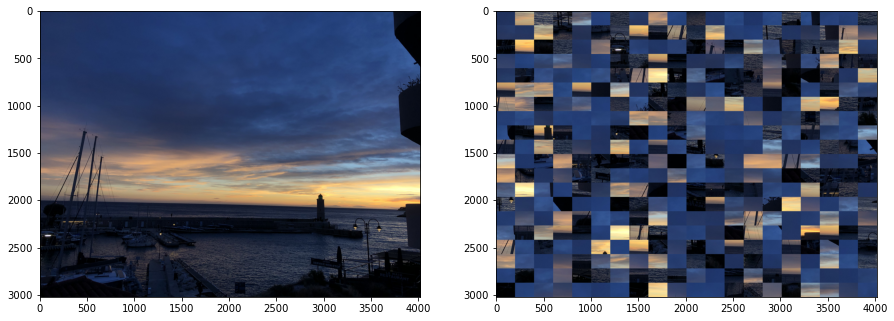

In [7]:
L_before=[]
for i in range(n_long):
    hor = arrays[n_larg*i]
    for j in range(1,n_larg):
        hor = np.hstack([hor,arrays_before[n_larg*i+j]])
    L_before.append(hor)
res_before = np.vstack(L_before)


L_after=[]
for i in range(n_long):
    hor = arrays_after[n_larg*i]
    for j in range(1,n_larg):
        hor = np.hstack([hor,arrays_after[n_larg*i+j]])
    L_after.append(hor)
res_after = np.vstack(L_after)

show([res_before,res_after],unique = False)

# Definition of functions

In [8]:
def get_discontinuities(im1,im2,where1,where2):
    if where1 == 'L' and where2 == 'R':
        return abs(im1[:,-1].astype('int')-im2[:,0].astype('int')).mean()
    if where1 == 'R' and where2 == 'L':
        return abs(im2[:,-1].astype('int')-im1[:,0].astype('int')).mean()
    if where1 == 'T' and where2 == 'B':
        return abs(im1[-1,:].astype('int')-im2[0,:].astype('int')).mean()
    if where1 == 'B' and where2 == 'T':
        return abs(im1[-1,:].astype('int')-im2[0,:].astype('int')).mean()


In [9]:
def find_south_neighbour(im1,array):
    L = []
    for i,ar in enumerate(array):
        L.append(get_discontinuities(im1,ar,'T','B'))
    res = array[L.index(min(L))]
    array = np.vstack([array[:L.index(min(L)),:,:],array[L.index(min(L))+1:,:,:]])
    return res,array

In [10]:
def select_first_column(arrays_after):
    col = [arrays_after[0]]
    ar = arrays_after[0]
    for i in range(n_long-1):
        a, arrays_after = find_south_neighbour(ar,arrays_after)
        col.append(a)
        ar = col[-1]
    return col,arrays_after

In [11]:
def find_east_neighbour(im,arrays,row_number,oldroot,j):
    L = []
    for i,ar in enumerate(arrays):
        if row_number!=0: L.append(get_discontinuities(im,ar,'L','R')) #+ get_discontinuities(oldroot[j+1],ar,'T','B'))
        else: L.append(get_discontinuities(im,ar,'L','R'))
    res = arrays[L.index(min(L))]
    arrays = np.vstack([arrays[:L.index(min(L)),:,:],arrays[L.index(min(L))+1:,:,:]]) #np.delete(arrays,L.index(min(L)))
    return res,arrays

In [12]:
def construct_row(root,arrays,row_number,oldroot):
    row = [root]
    ar = root
    for j in range(n_larg-1):
        a,arrays = find_east_neighbour(ar,arrays,row_number,oldroot,j)
        row.append(a)
        ar = row[-1]
    return row,arrays

# Reconstruction

longueur array 1
Temps d'exécution : 6.8s


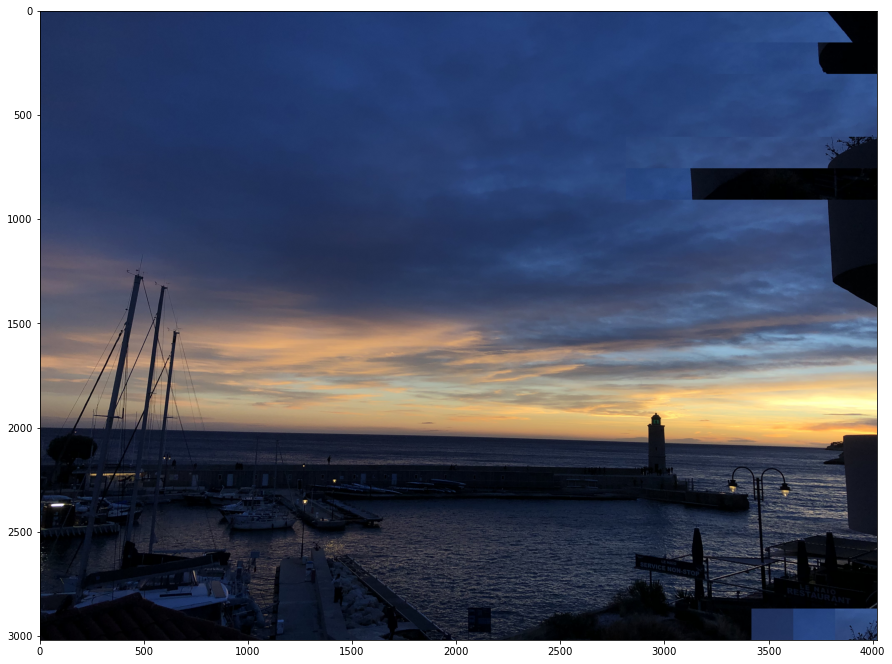

In [13]:
def construct_image(arrays_after):
    col,arrays_after = select_first_column(arrays_after)
    res=[]
    oldroot = None
    for i,root in enumerate(col):
        a ,arrays_after = construct_row(root,arrays_after,i,oldroot)
        res = res + a
        oldroot = a
    print('longueur array',len(arrays_after))
    return res

res = construct_image(arrays_after)
L = []
for i in range(n_long):
    hor = res[n_larg*i]
    for j in range(1,n_larg):
        hor = np.hstack([hor,res[n_larg*i+j]])
    L.append(hor)
res = np.vstack(L)
show(res,2)

end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}s')

In [14]:
x,y,z = np.shape(res)
np.unique(res==nessi[:x,:y,:])

array([False,  True])

# We retrieve the original image